In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
pip install StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for StandardScaler: filename=StandardScaler-0.5-py3-none-any.whl size=2613 sha256=660a26407422a31deab78cb48867849c420023169bb24cb7487d0f69561c7d20
  Stored in directory: /root/.cache/pip/wheels/6f/3d/07/ed324a52d8ce97682f9a6d184539debbd32c9bf66c5498a12b
Successfully built StandardScaler


In [ ]:

path ='BankChurners.csv'
df = pd.read_csv(path)
df.head(20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,12691.0,1.335,1144,42,1.625
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,8256.0,1.541,1291,33,3.714
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,3418.0,2.594,1887,20,2.333
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,3313.0,1.405,1171,20,2.333
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,4716.0,2.175,816,28,2.500
5,713061558,Existing Customer,44,M,Graduate,Married,$40K - $60K,Blue,4010.0,1.376,1088,24,0.846
6,810347208,Existing Customer,51,M,Unknown,Married,$120K +,Gold,34516.0,1.975,1330,31,0.722
7,818906208,Existing Customer,32,M,High School,Unknown,$60K - $80K,Silver,29081.0,2.204,1538,36,0.714
8,710930508,Existing Customer,37,M,Uneducated,Single,$60K - $80K,Blue,22352.0,3.355,1350,24,1.182
9,719661558,Existing Customer,48,M,Graduate,Single,$80K - $120K,Blue,11656.0,1.524,1441,32,0.882


In [ ]:

#thống kê mô tả
df.describe()


,CLIENTNUM,Customer_Age,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,8631.953698,0.759941,4404.086304,64.858695,0.712222
std,3.690378e+07,8.016814,9088.776650,0.219207,3397.129254,23.472570,0.238086
min,7.080821e+08,26.000000,1438.300000,0.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,2555.000000,0.631000,2155.500000,45.000000,0.582000
50%,7.179264e+08,46.000000,4549.000000,0.736000,3899.000000,67.000000,0.702000
75%,7.731435e+08,52.000000,11067.500000,0.859000,4741.000000,81.000000,0.818000
max,8.283431e+08,73.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000


<ipython-input-112-3896104ce809>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().abs()


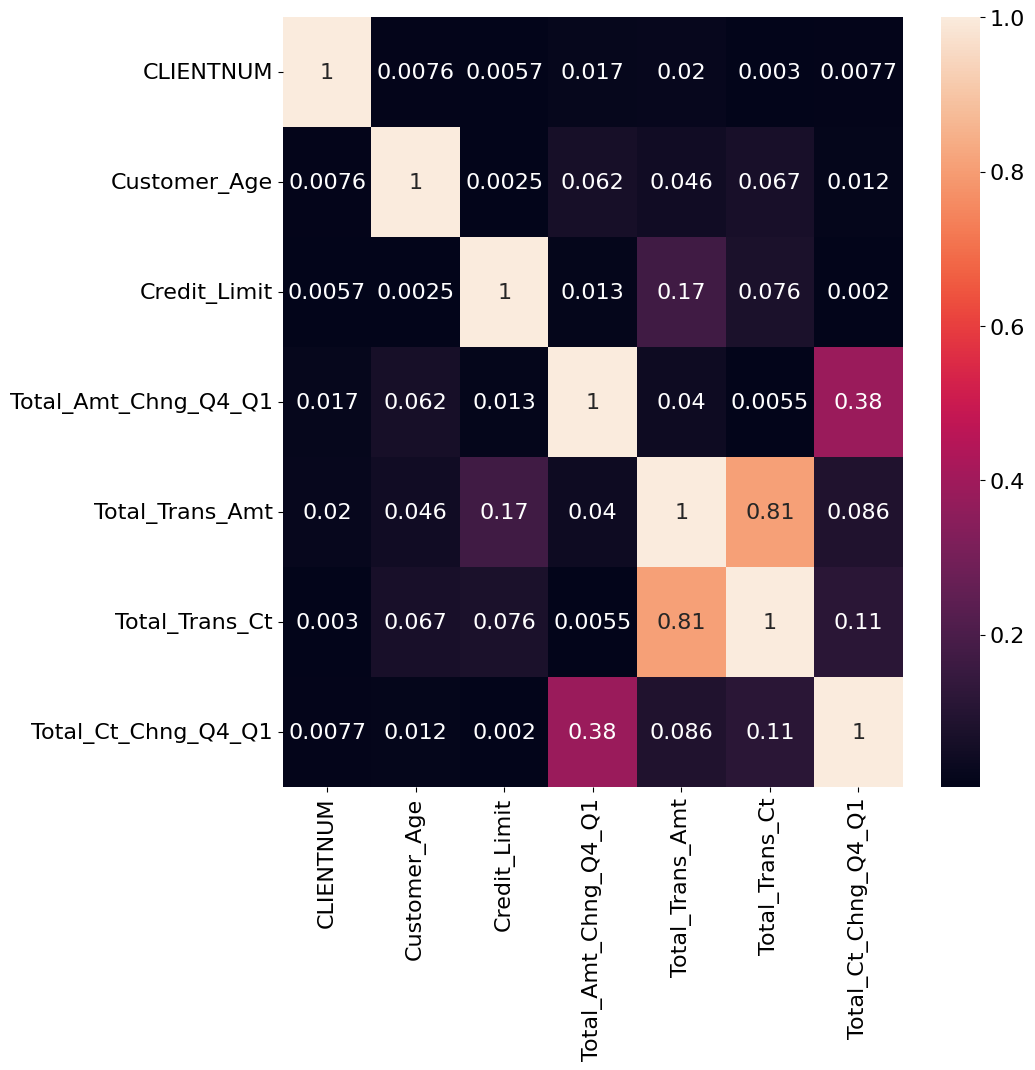

In [ ]:
correlation = df.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_original = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,12691.0,1.335,1144,42,1.625
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,8256.0,1.541,1291,33,3.714
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,3418.0,2.594,1887,20,2.333
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,3313.0,1.405,1171,20,2.333
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,4716.0,2.175,816,28,2.500


In [ ]:
df['Education_Level'] = df['Education_Level'].astype(str)
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,CLIENTNUM,Customer_Age,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Attrition_Flag_Existing Customer,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45,12691.0,1.335,1144,42,1.625,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,818770008,49,8256.0,1.541,1291,33,3.714,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,713982108,51,3418.0,2.594,1887,20,2.333,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,769911858,40,3313.0,1.405,1171,20,2.333,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,709106358,40,4716.0,2.175,816,28,2.500,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_dummies = df_dummies.drop(['CLIENTNUM'], axis=1)


In [ ]:
columns = df_dummies.columns.values
columns

array(['Customer_Age', 'Credit_Limit', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Attrition_Flag_Existing Customer', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'], dtype=object)

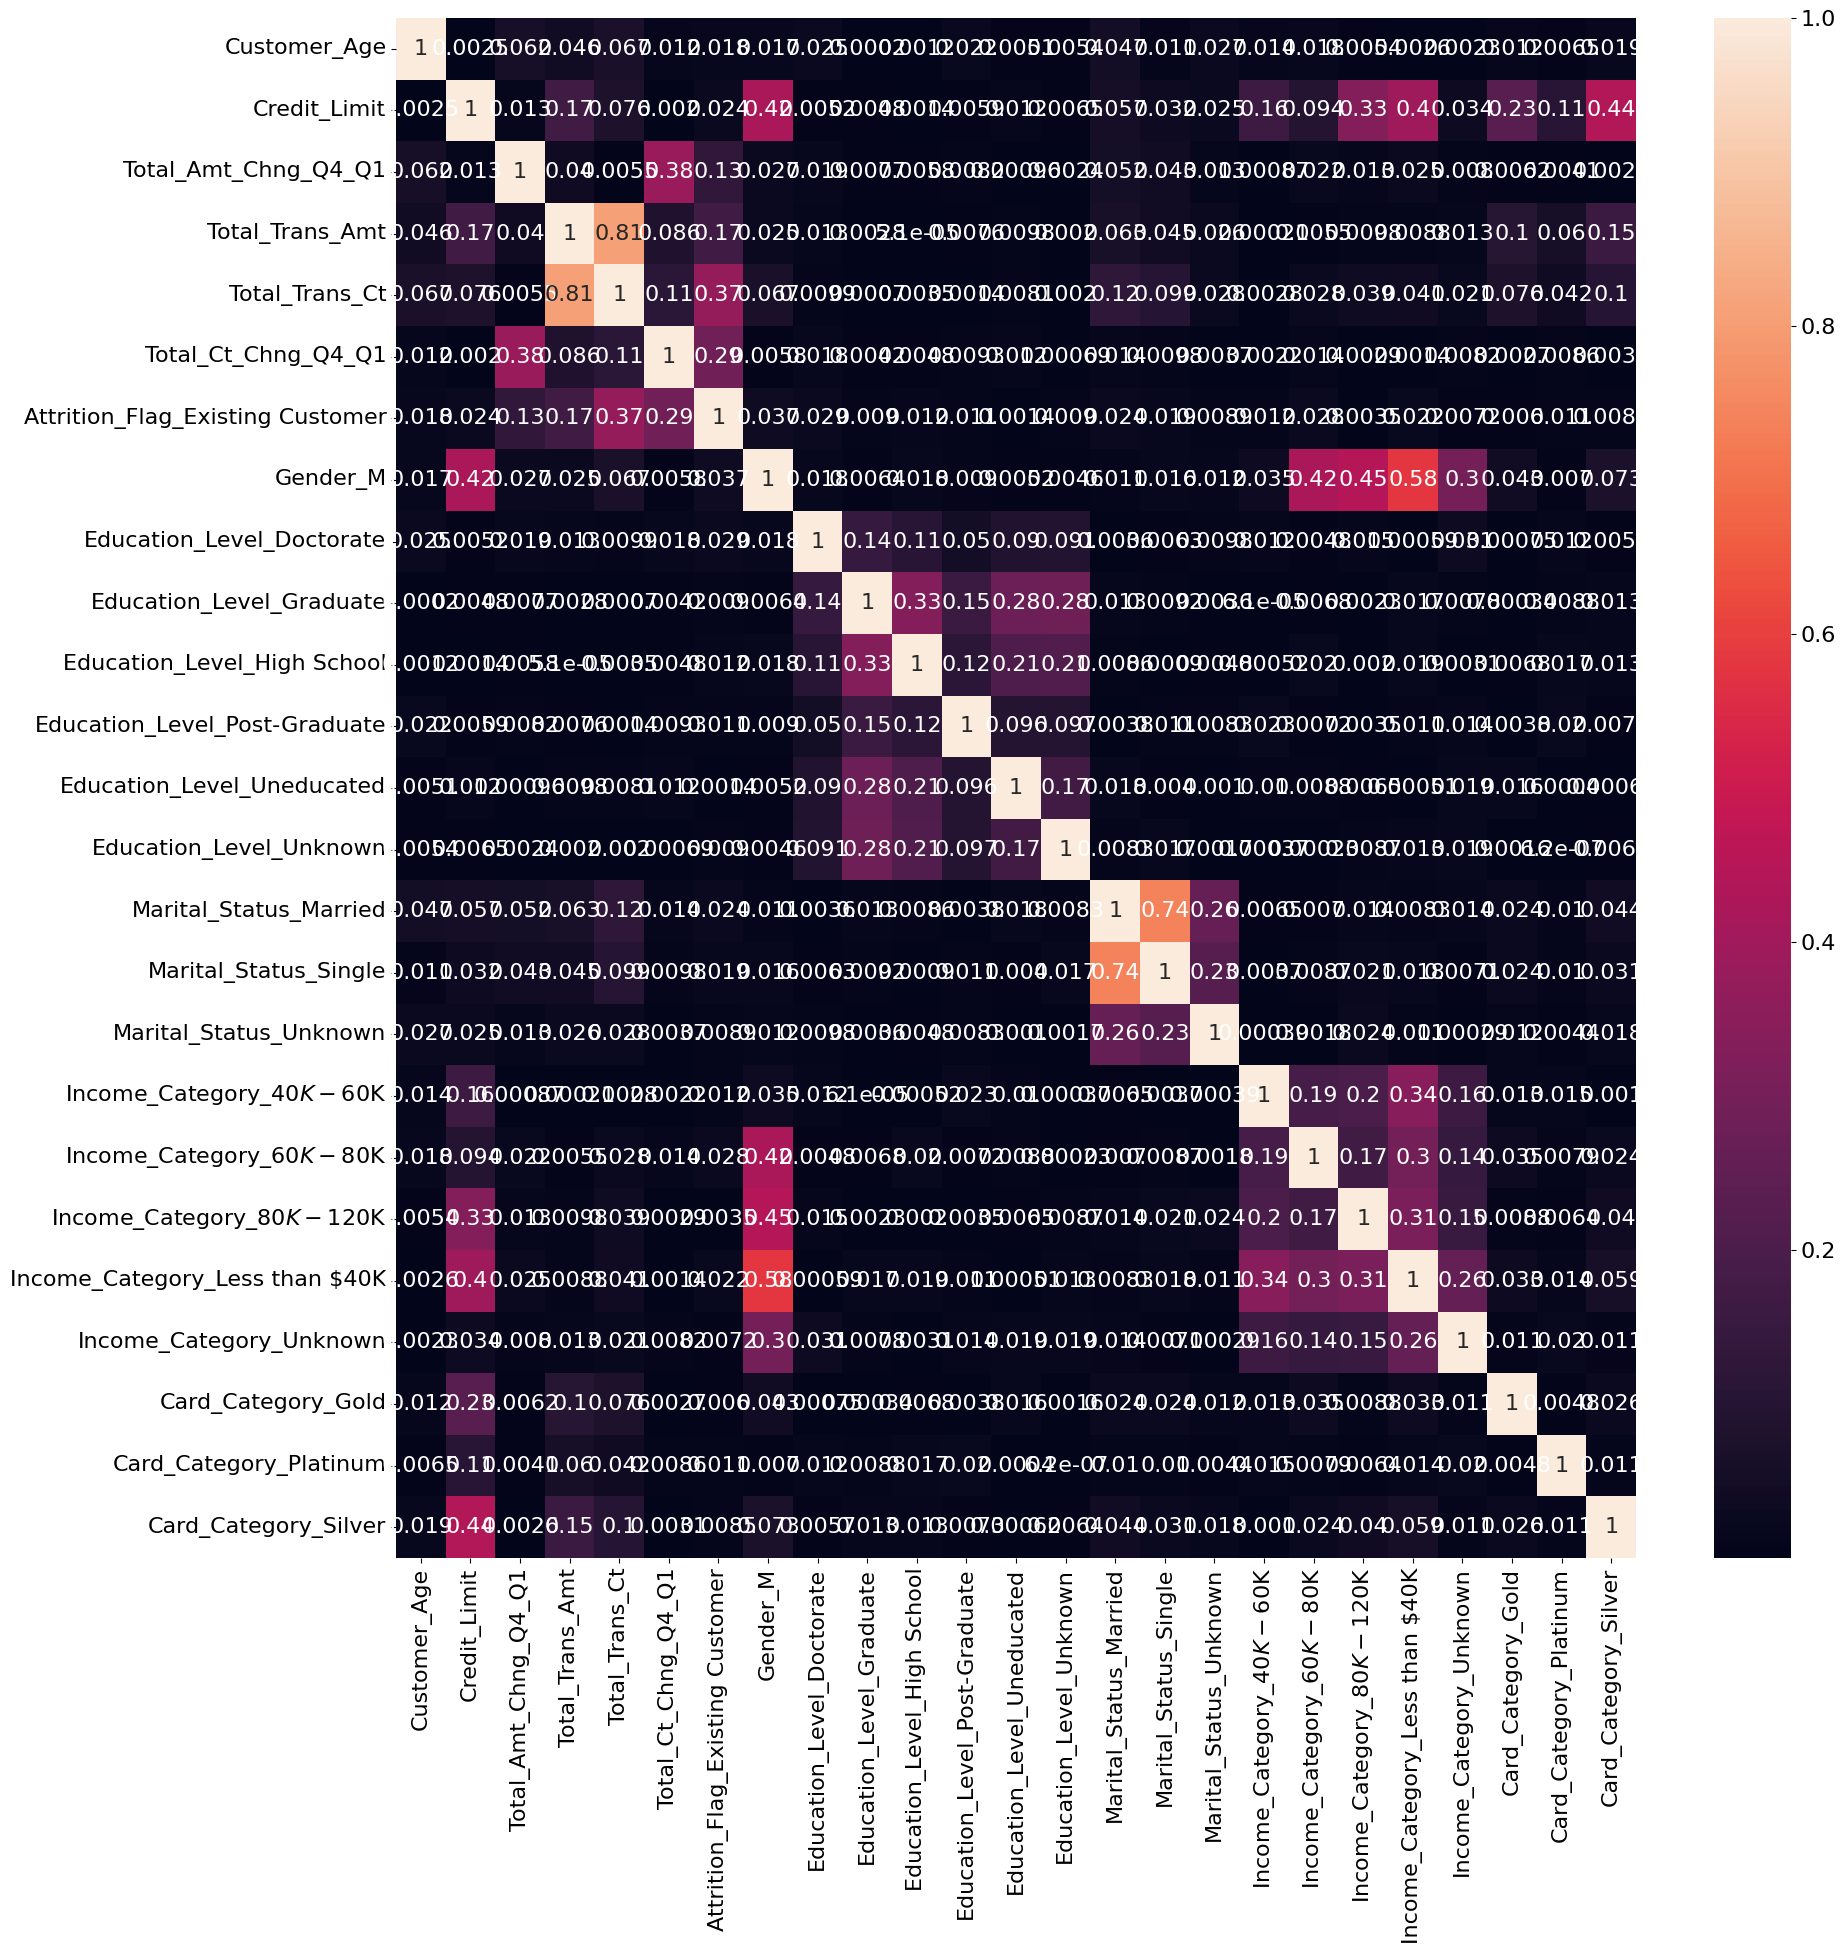

In [ ]:
correlation = df_dummies.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
index = np.where(columns == 'Attrition_Flag_Existing Customer')[0]
X_indexes = list(np.delete(columns, index))
y_indexes = ['Attrition_Flag_Existing Customer']

X = df_dummies[X_indexes]
y = df_dummies[y_indexes]

X_standarized = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standarized, y, test_size = .30, random_state=42)

clf = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=200).fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.859822309970385

In [ ]:
X_indexes

['Customer_Age',
 'Credit_Limit',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Gender_M',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_Unknown',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver']

In [ ]:
y

,Attrition_Flag_Existing Customer
0,1
1,1
2,1
3,1
4,1
...,...
10122,1
10123,0
10124,0
10125,0


<ipython-input-122-fd21f089082b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fields_correlation = sns.heatmap(df.corr(), vmin=-1, cmap="PuBu", annot=True, ax=ax)


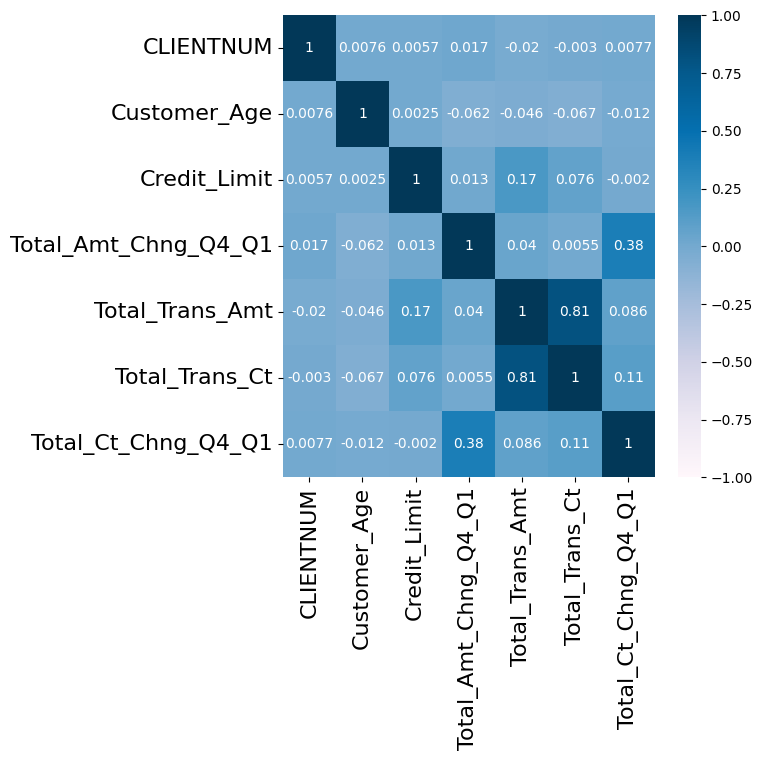

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 10})

fields_correlation = sns.heatmap(df.corr(), vmin=-1, cmap="PuBu", annot=True, ax=ax)

In [ ]:
index = np.where(columns == 'Attrition_Flag_Existing Customer')[0]
X_indexes = list(np.delete(columns, index))
y_indexes = ['Attrition_Flag_Existing Customer']

X = df_dummies[X_indexes]
y = df_dummies[y_indexes]

X_standarized = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standarized, y, test_size = .25, random_state=42)

clf = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=200).fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8562401263823065

In [ ]:
index = np.where(columns == 'Attrition_Flag_Existing Customer')[0]
X_indexes = list(np.delete(columns, index))
y_indexes = ['Attrition_Flag_Existing Customer']

X = df_dummies[X_indexes]
y = df_dummies[y_indexes]

X_standarized = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standarized, y, test_size = .10, random_state=42)

clf = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=200).fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8657453109575518

Model này có độ chính xác là 86,57% với training là 90%, test 10%. Trong ma trận nhầm lẫn, chúng ta có thể thấy phần lớn các lỗi là loại 1 và số lỗi loại 2 khá thấp. Model này khá tốt, có thể cải thiện nhưng điều này không phải là mục tiêu hiện tại. Chúng ta cần kiểm tra các hệ số của mô hình để xem biến nào liên quan nhiều hơn đến hành động churn.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Customer_Age',""
                'Credit_Limit',
                         'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,13.170799,Customer_Age
1,1.900076,Credit_Limit
2,13.119733,Total_Amt_Chng_Q4_Q1
3,7.636121,Total_Trans_Ct
4,11.491021,Total_Ct_Chng_Q4_Q1


In [ ]:
## Will drop any feature with VIF>10
## Customer Age, Total Amt Chng Q4-Q1, and Total Ct Chng Q4-Q1

In [ ]:
bank_clients_d=df.copy()
bank_clients_d=bank_clients_d.drop(['Customer_Age'], axis=1)
bank_clients_d=bank_clients_d.drop(['Total_Amt_Chng_Q4_Q1'], axis=1)
bank_clients_d=bank_clients_d.drop(['Total_Ct_Chng_Q4_Q1'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = bank_clients_d[['Credit_Limit','Total_Trans_Ct']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,1.798428,Credit_Limit
1,1.798428,Total_Trans_Ct


In [ ]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[ 51,  94],
       [ 42, 826]])

In [ ]:
coef = pd.DataFrame(clf.coef_[0], index = X_indexes, columns = ['Coefficients'])
coef

,Coefficients
Customer_Age,0.045948
Credit_Limit,0.148125
Total_Amt_Chng_Q4_Q1,0.129350
Total_Trans_Amt,-1.613413
Total_Trans_Ct,2.518554
Total_Ct_Chng_Q4_Q1,0.735670
Gender_M,0.446273
Education_Level_Doctorate,-0.096216
Education_Level_Graduate,-0.021453
Education_Level_High School,-0.016915


In [ ]:
no_dummie_coef = coef.iloc[0:13, 0]
dummie_coef = coef.iloc[13:len(coef), 0]

In [ ]:
dummie_coef.sort_values()


Card_Category_Gold               -0.091468
Marital_Status_Single            -0.075319
Card_Category_Silver             -0.069317
Card_Category_Platinum           -0.059802
Marital_Status_Unknown           -0.021598
Income_Category_$80K - $120K      0.054986
Income_Category_$60K - $80K       0.125273
Income_Category_Unknown           0.163972
Income_Category_$40K - $60K       0.260345
Marital_Status_Married            0.267399
Income_Category_Less than $40K    0.285243
Name: Coefficients, dtype: float64

Dường như biến quan trọng nhất trong các biến giả là Giới tính. Chúng ta có thể thấy rằng việc là nam có tác động tích cực đến khách hàng hiện có, điều này có nghĩa là nữ giới có xu hướng churn ngân hàng hơn, điều này đã được đo lường trước đó. Chúng ta cũng có thể thấy rằng những người có thu nhập thấp có xu hướng ở lại ngân hàng cũng như những người có tình trạng hôn nhân, và những người không khai báo thu nhập.

In [ ]:
no_dummie_coef.sort_values()


Total_Trans_Amt                 -1.613413
Education_Level_Doctorate       -0.096216
Education_Level_Unknown         -0.068659
Education_Level_Post-Graduate   -0.063143
Education_Level_Uneducated      -0.039832
Education_Level_Graduate        -0.021453
Education_Level_High School     -0.016915
Customer_Age                     0.045948
Total_Amt_Chng_Q4_Q1             0.129350
Credit_Limit                     0.148125
Gender_M                         0.446273
Total_Ct_Chng_Q4_Q1              0.735670
Total_Trans_Ct                   2.518554
Name: Coefficients, dtype: float64

Chúng ta có thể thấy rằng #1'Total_Trans_Ct' có ảnh hưởng tích cực đến việc khách hàng ở lại và ảnh hưởng này có vẻ khá đáng kể. Tính năng này đo lường tổng số giao dịch được thực hiện trong 12 tháng qua. Vì vậy điều này có nghĩa là khách hàng thực hiện nhiều giao dịch hơn trong 12 tháng qua thì khả năng ở lại của họ cũng cao hơn, điều này khá hợp lý.
Chúng ta cũng có thể thấy rằng 'Total_Trans_Amt' có ảnh hưởng tiêu cực đáng kể đến quyết định ở lại của khách hàng. Tính năng này đo lường tổng số tiền giao dịch trong 12 tháng qua. Theo một cách nào đó, điều này cũng hợp lý vì khi khách hàng bỏ đi, ngân hàng sẽ thu hết tiền gửi của họ.
Chúng ta cũng có thể thấy trên 'Total_Revolving_Bal' rằng khách hàng nợ nhiều hơn thì có khả năng ở lại cũng cao hơn.
Với tính năng 'Total_Relationship_Count', chúng ta có thể thấy rằng khách hàng thuê nhiều sản phẩm hơn thì có khả năng ở lại cũng cao hơn.
Với biến'Total_Ct_Chng_Q4_Q1', chúng ta có thể thấy rằng khách hàng chi tiêu nhiều hơn trong Q4 so với Q1 thì khả năng ở lại cũng cao hơn.
Với biến 'Contacts_Count_12_mon', chúng ta có thể thấy rằng khách hàng liên hệ nhiều hơn với ngân hàng thì có khả năng bỏ đi cũng cao hơn.
Với biến 'Months_Inactive_12_mon', chúng ta có thể thấy rằng khách hàng càng ít hoạt động thì khả năng bỏ đi càng cao.

In [ ]:
df.isnull().sum()


CLIENTNUM               0
Attrition_Flag          0
Customer_Age            0
Gender                  0
Education_Level         0
Marital_Status          0
Income_Category         0
Card_Category           0
Credit_Limit            0
Total_Amt_Chng_Q4_Q1    0
Total_Trans_Amt         0
Total_Trans_Ct          0
Total_Ct_Chng_Q4_Q1     0
dtype: int64

In [ ]:
df.loc[df['Customer_Age'] == 0, ['Customer_Age']].sum()


Customer_Age    0.0
dtype: float64

In [ ]:
df['Education_Level'].unique()


array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
df.loc[df['Education_Level'] == 'Unknown', ['Education_Level']].shape[0] / df.shape[0]


0.14999506270366347

In [ ]:
def null_detector(df, column):
    return df.loc[df[column] == 'Unknown', [column]].shape[0] / df.shape[0]

null_detector(df, 'Education_Level')

0.14999506270366347

In [ ]:
for column in df.columns:
    print(column + "=" + str(null_detector(df, column)))

CLIENTNUM=0.0
Attrition_Flag=0.0
Customer_Age=0.0
Gender=0.0
Education_Level=0.14999506270366347
Marital_Status=0.07396069912116125
Income_Category=0.10980547052434086
Card_Category=0.0
Credit_Limit=0.0
Total_Amt_Chng_Q4_Q1=0.0
Total_Trans_Amt=0.0
Total_Trans_Ct=0.0
Total_Ct_Chng_Q4_Q1=0.0


In [ ]:
df['Income_Category'].unique()


array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
pip install svgutils==0.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
column_values = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
index_values = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
incomeAllDf = pd.DataFrame(
    index = index_values, columns = column_values)
for income in index_values:
    incomeCount = df.loc[df['Income_Category'] == income, ['Education_Level']].value_counts()
    for column in column_values:
        incomeAllDf.loc[income, column] = incomeCount[column]
incomeAllDf

,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Unknown,145,185,225,108,332,47,70
Less than $40K,556,522,671,345,1139,170,158
$40K - $60K,269,249,355,183,553,111,70
$60K - $80K,210,195,307,132,422,77,59
$80K - $120K,219,217,308,175,478,81,57
$120K +,120,119,147,70,204,30,37


In [ ]:
for column in incomeAllDf.columns:
    incomeAllDf[column] = incomeAllDf[column] / incomeAllDf[column].sum()
incomeAllDf

,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Unknown,0.095458,0.124412,0.111773,0.106614,0.106138,0.091085,0.155211
Less than $40K,0.36603,0.351042,0.333333,0.340573,0.36413,0.329457,0.350333
$40K - $60K,0.17709,0.167451,0.176354,0.180652,0.17679,0.215116,0.155211
$60K - $80K,0.138249,0.131137,0.152509,0.130306,0.13491,0.149225,0.13082
$80K - $120K,0.144174,0.145931,0.153005,0.172754,0.152813,0.156977,0.126386
$120K +,0.078999,0.080027,0.073025,0.069102,0.065217,0.05814,0.08204


<Axes: >

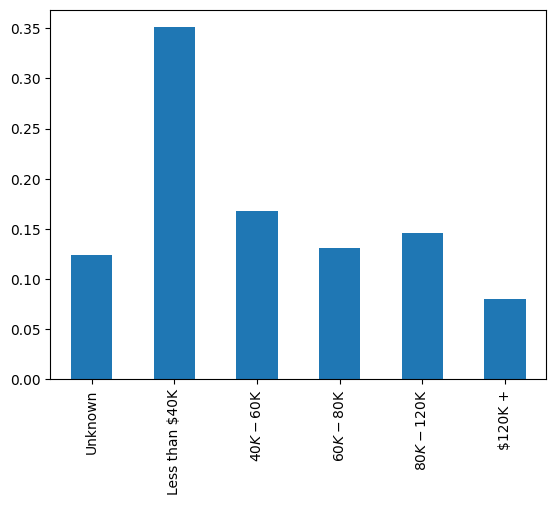

In [ ]:
incomeAllDf['Uneducated'].plot(kind='bar')


<Axes: >

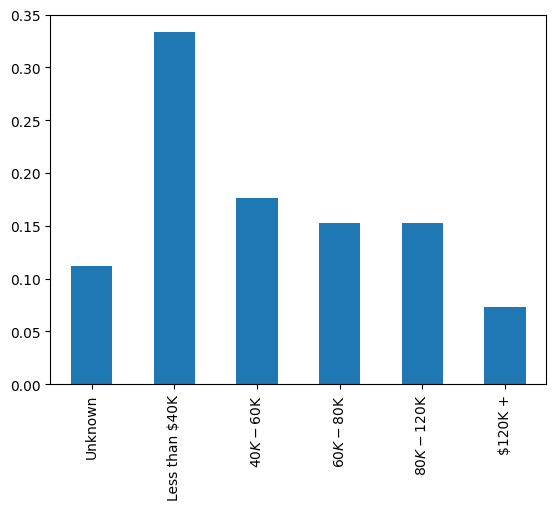

In [ ]:
incomeAllDf['High School'].plot(kind='bar')


<Axes: >

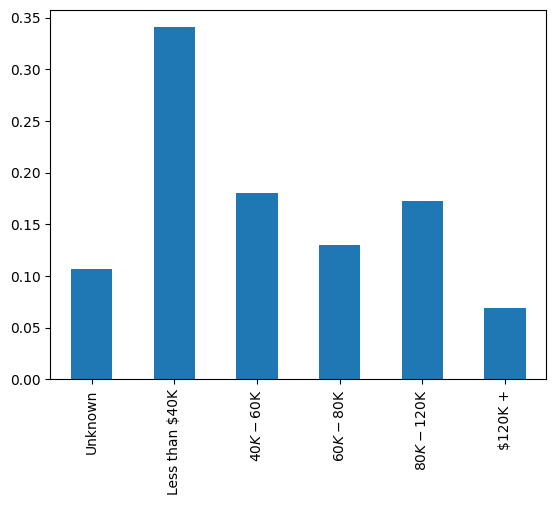

In [ ]:
incomeAllDf['College'].plot(kind='bar')


<Axes: >

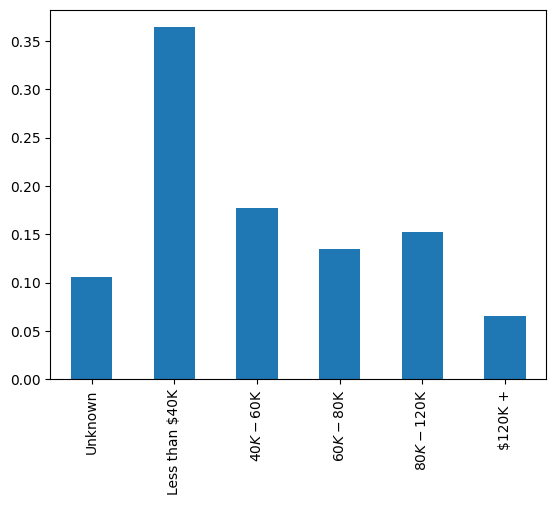

In [ ]:
incomeAllDf['Graduate'].plot(kind='bar')


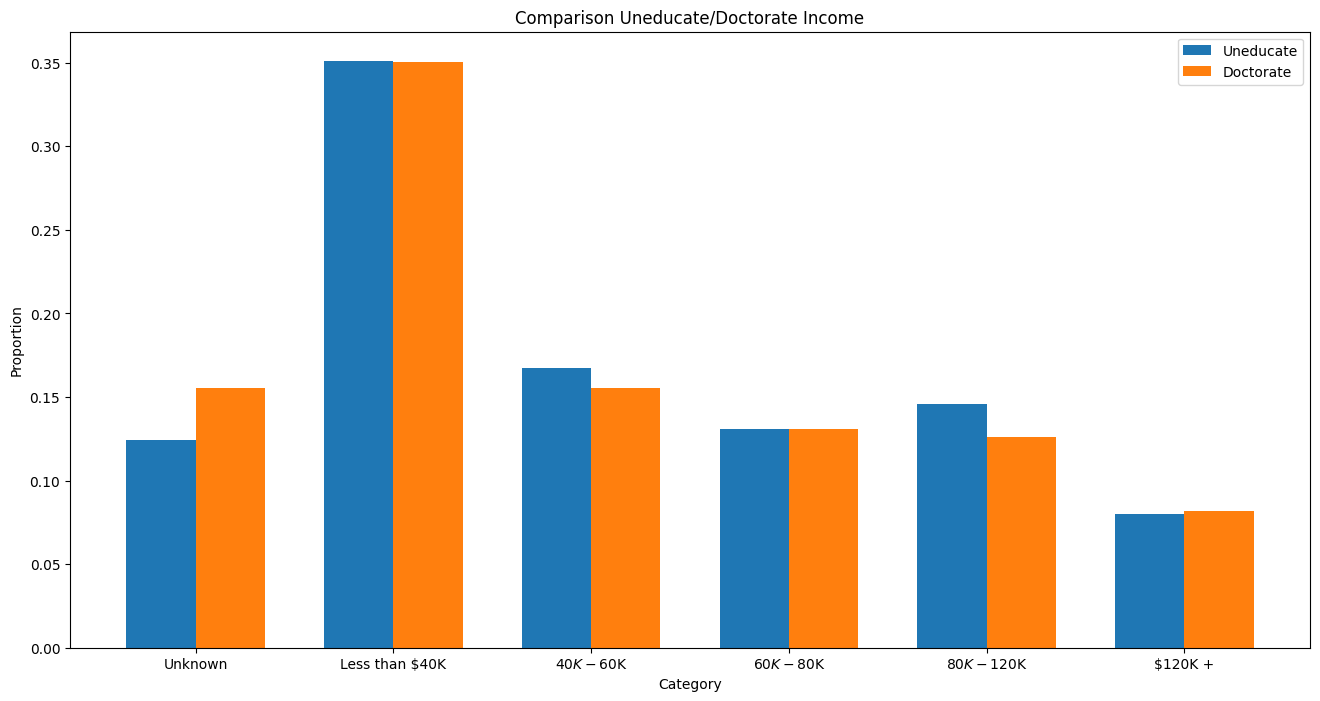

In [ ]:
index = np.arange(len(index_values))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
uneducated = ax.bar(index, incomeAllDf['Uneducated'], bar_width, label="Uneducate")

doctorate = ax.bar(index+bar_width, incomeAllDf['Doctorate'], bar_width, label="Doctorate")

ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Comparison Uneducate/Doctorate Income')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_values)
ax.legend()

plt.show()

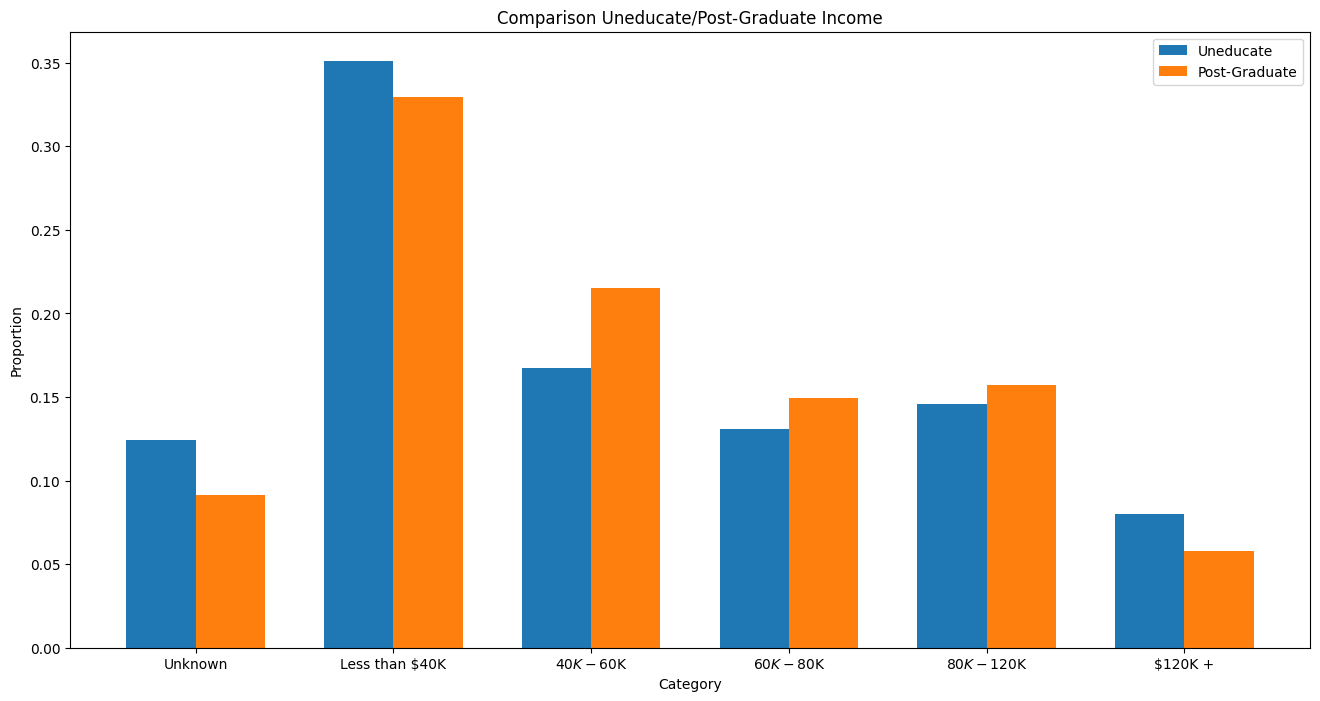

In [ ]:
index = np.arange(len(index_values))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
uneducated = ax.bar(index, incomeAllDf['Uneducated'], bar_width, label="Uneducate")

doctorate = ax.bar(index+bar_width, incomeAllDf['Post-Graduate'], bar_width, label="Post-Graduate")

ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Comparison Uneducate/Post-Graduate Income')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_values)
ax.legend()

plt.show()

In [ ]:
column_values = ['M', 'F']
index_values = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
incomeAllGe = pd.DataFrame(index = index_values, columns = column_values)
for income in index_values:
    incomeCount = df.loc[df['Income_Category'] == income, ['Gender']].value_counts()
    for column in column_values:
        try:
            incomeAllGe.loc[income, column] = incomeCount[column]
        except KeyError:
            incomeAllGe.loc[income, column] = 0
incomeAllGe

,M,F
Unknown,52,1060
Less than $40K,277,3284
$40K - $60K,776,1014
$60K - $80K,1402,0
$80K - $120K,1535,0
$120K +,727,0


In [ ]:
for column in incomeAllGe.columns:
    incomeAllGe[column] = incomeAllGe[column] / incomeAllGe[column].sum()
incomeAllGe

,M,F
Unknown,0.010904,0.197835
Less than $40K,0.058083,0.612915
$40K - $60K,0.162718,0.18925
$60K - $80K,0.293982,0.0
$80K - $120K,0.32187,0.0
$120K +,0.152443,0.0


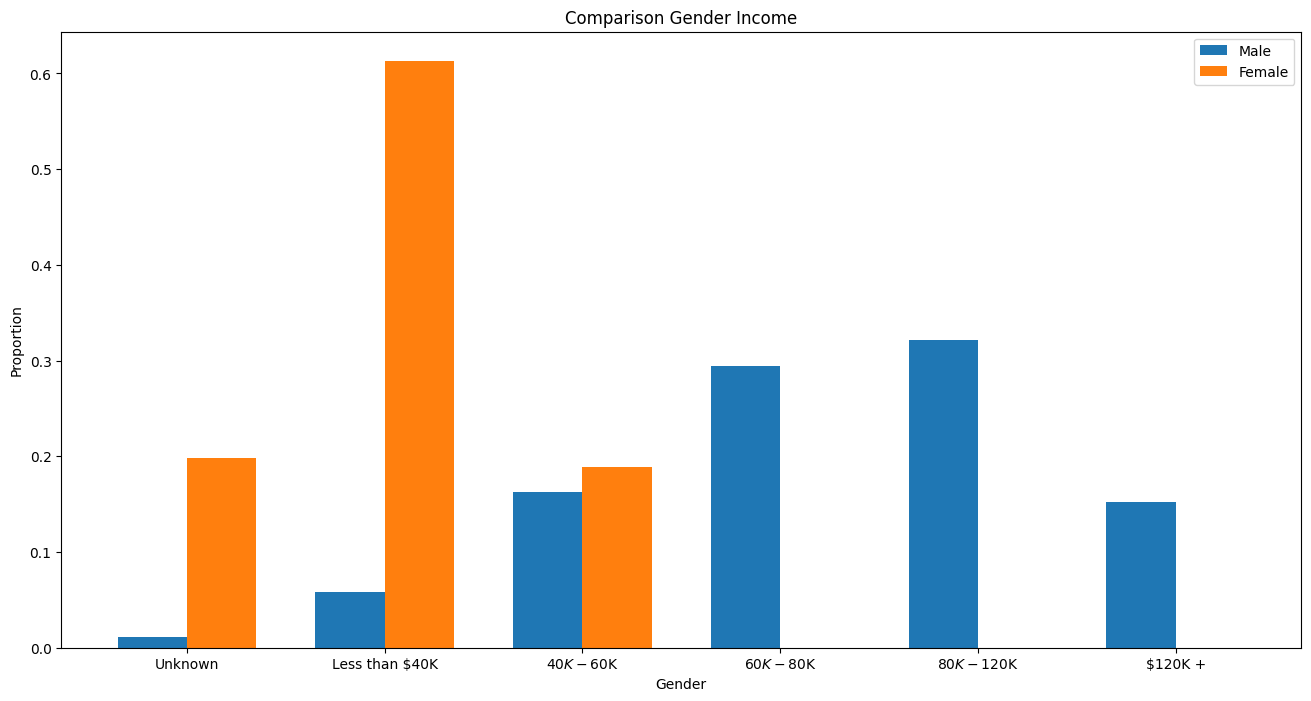

In [ ]:
index = np.arange(len(index_values))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
male = ax.bar(index, incomeAllGe['M'], bar_width, label="Male")

female = ax.bar(index+bar_width, incomeAllGe['F'], bar_width, label="Female")

ax.set_xlabel('Gender')
ax.set_ylabel('Proportion')
ax.set_title('Comparison Gender Income')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_values)
ax.legend()

plt.show()

Trong biểu đồ, chúng ta có thể quan sát được rằng phần lớn các khách hàng nam đang có mức lương cao hơn 60K và tất cả các khách hàng nữ đều có mức lương thấp hơn 60K. Điều này đưa cho chúng ta một câu hỏi khác, liệu giới tính nào có xu hướng churn (rời khỏi) ngân hàng nhiều hơn?

In [ ]:
column_values = ['M', 'F']
index_values = ['Existing Customer', 'Attrited Customer']
churnAllGe = pd.DataFrame(index = index_values, columns = column_values)
for index in index_values:
    valueCount = df.loc[df['Attrition_Flag'] == index, ['Gender']].value_counts()
    for column in column_values:
        try:
            churnAllGe.loc[index, column] = valueCount[column]
        except KeyError:
            churnAllGe.loc[index, column] = 0
churnAllGe

,M,F
Existing Customer,4072,4428
Attrited Customer,697,930


In [ ]:
for column in churnAllGe.columns:
    churnAllGe[column] = churnAllGe[column] / churnAllGe[column].sum()
churnAllGe

,M,F
Existing Customer,0.853848,0.826428
Attrited Customer,0.146152,0.173572


In [ ]:
churnAllGe.loc['Attrited Customer',][1] / churnAllGe.loc['Attrited Customer',][0]


1.1876125644860955

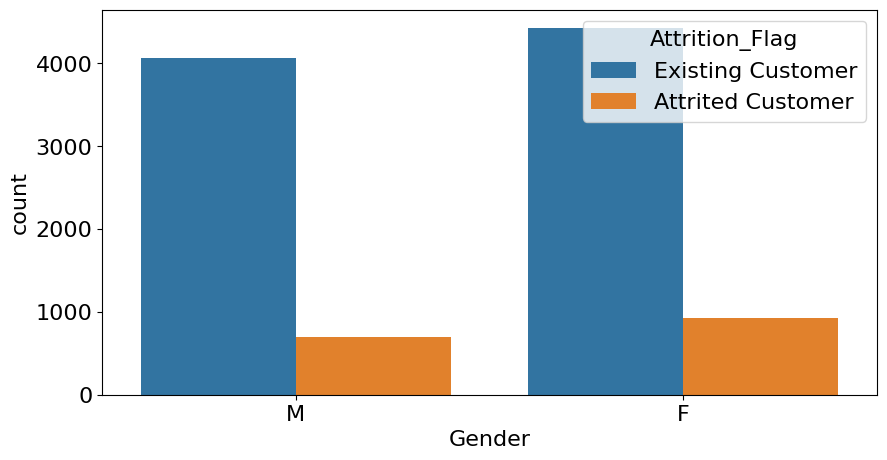

In [ ]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='Gender', hue = "Attrition_Flag", data = bank_clients_d, ax=ax)
plt.show()

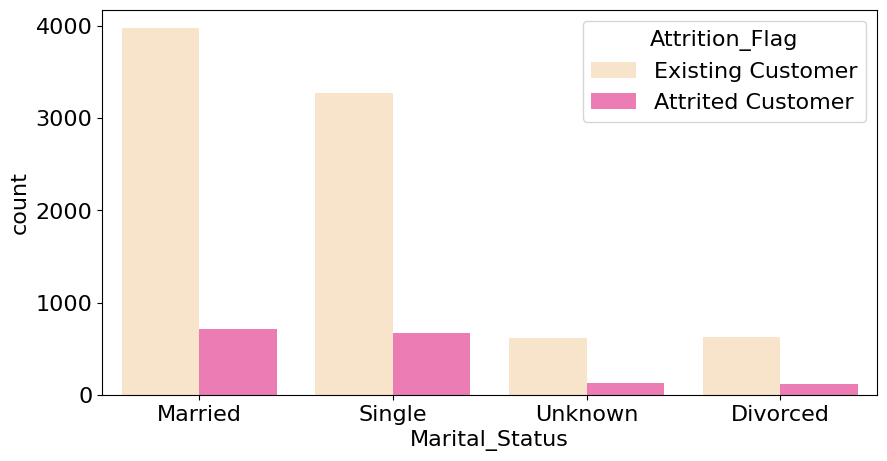

In [ ]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='Marital_Status', hue = "Attrition_Flag", data = bank_clients_d, ax=ax,palette=['#ffe4c4',"#ff69b4"])
plt.show()

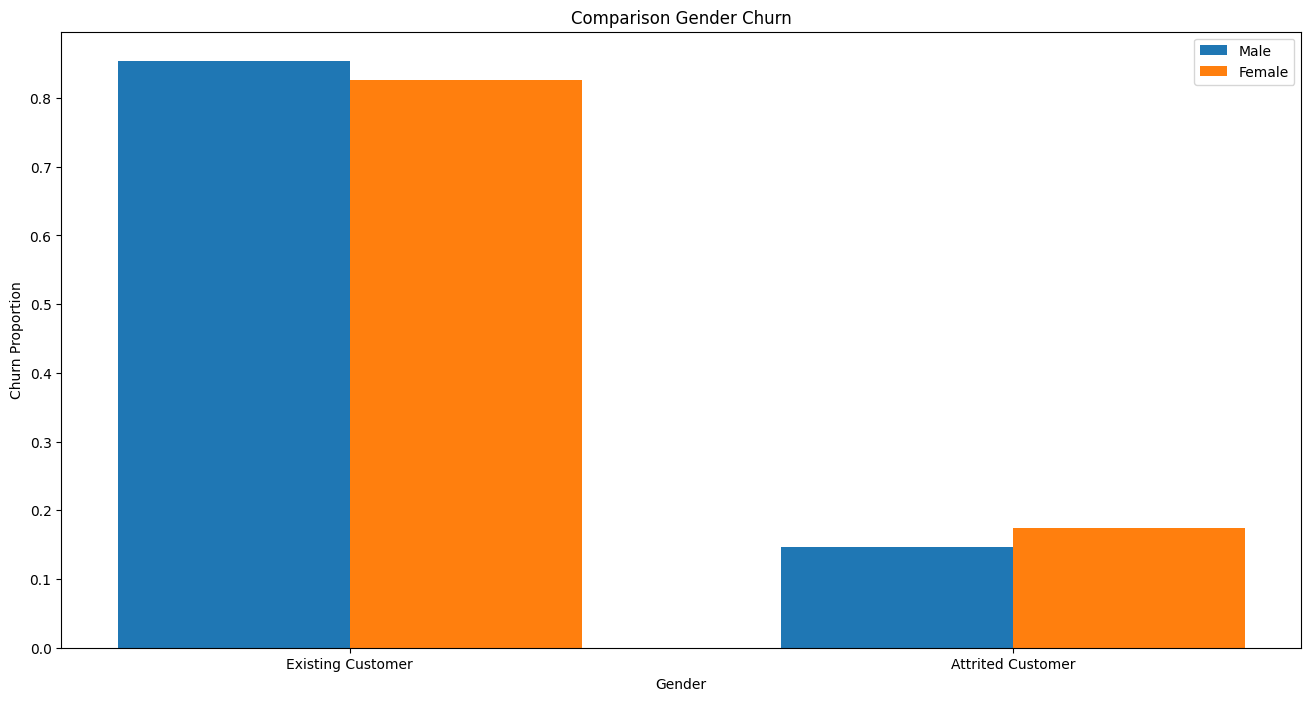

In [ ]:
index = np.arange(len(index_values))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

male = ax.bar(index, churnAllGe['M'], bar_width, label="Male")

female = ax.bar(index+bar_width, churnAllGe['F'], bar_width, label="Female")

ax.set_xlabel('Gender')
ax.set_ylabel('Churn Proportion')
ax.set_title('Comparison Gender Churn')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_values)
ax.legend()

plt.show()


In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Credit_Limit', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

<ipython-input-158-1d0cbbba42eb>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fields_correlation = sns.heatmap(df_clean.corr(), vmin=-1, cmap="PuBu", annot=True, ax=ax)


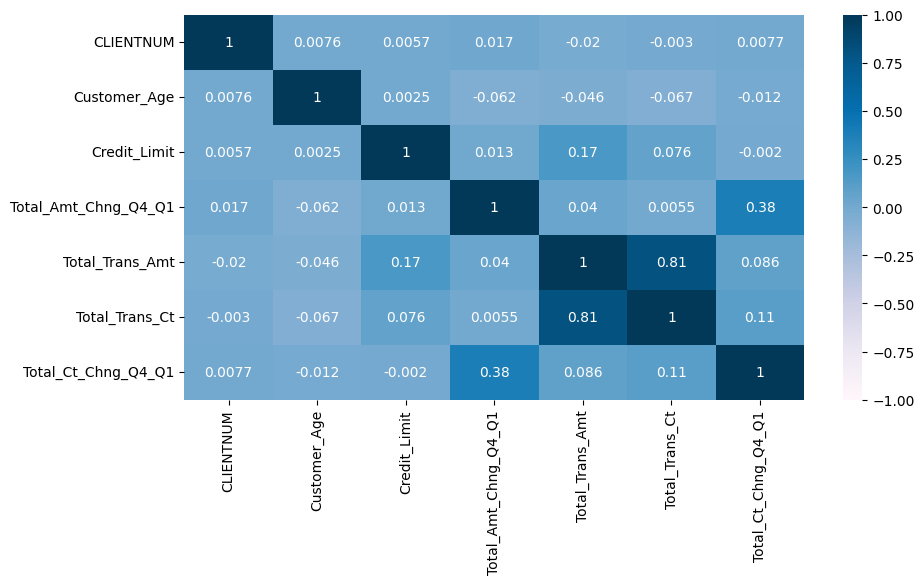

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams.update({'font.size': 10})

fields_correlation = sns.heatmap(df_clean.corr(), vmin=-1, cmap="PuBu", annot=True, ax=ax)

In [ ]:
df_clean.describe()

,CLIENTNUM,Customer_Age,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,8631.953698,0.759941,4404.086304,64.858695,0.712222
std,3.690378e+07,8.016814,9088.776650,0.219207,3397.129254,23.472570,0.238086
min,7.080821e+08,26.000000,1438.300000,0.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,2555.000000,0.631000,2155.500000,45.000000,0.582000
50%,7.179264e+08,46.000000,4549.000000,0.736000,3899.000000,67.000000,0.702000
75%,7.731435e+08,52.000000,11067.500000,0.859000,4741.000000,81.000000,0.818000
max,8.283431e+08,73.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000


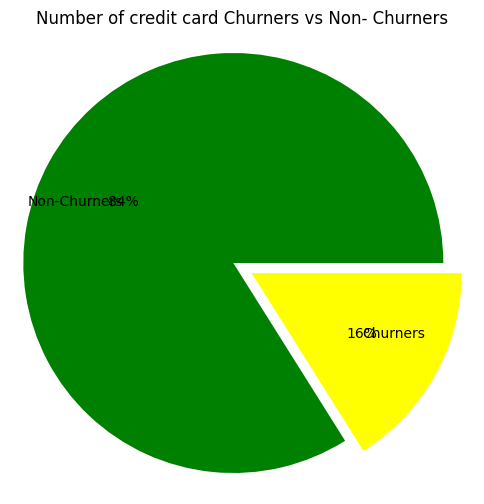

In [ ]:
plt.figure(figsize=[6,6])
sorted_counts= df_clean.Attrition_Flag.value_counts()
plt.pie(sorted_counts, explode=(0.1,0),labels=['Non-Churners', 'Churners'],
       colors=['green', 'yellow'], autopct='%1.0f%%',
       shadow=False, startangle=0,
       pctdistance=0.6,labeldistance=0.6)
plt.axis('equal')
plt.title("Number of credit card Churners vs Non- Churners");

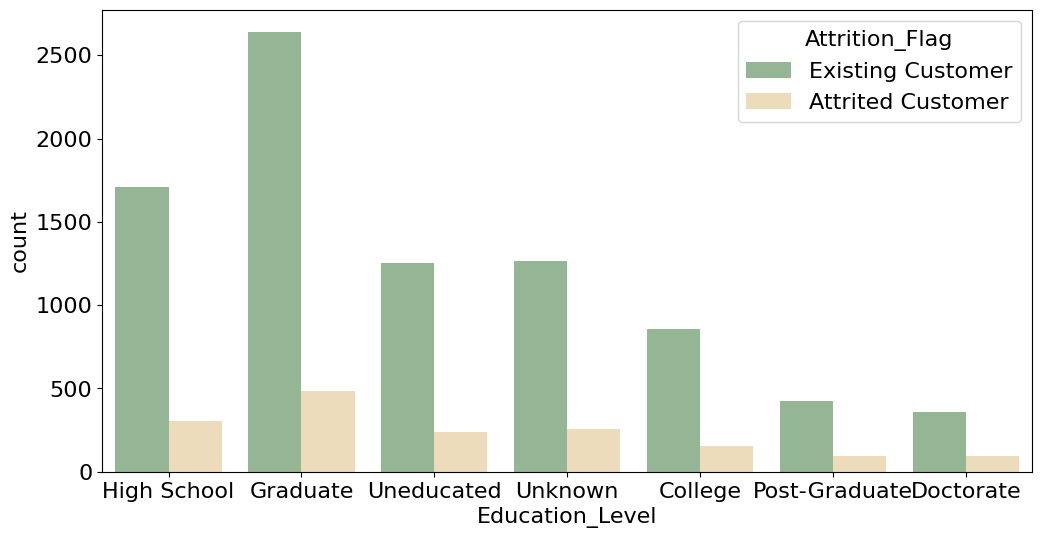

In [ ]:

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='Education_Level', hue = "Attrition_Flag", data = bank_clients_d, ax=ax,palette=['#8fbc8f',"#f5deb3"])
plt.show()

<Figure size 5000x600 with 0 Axes>

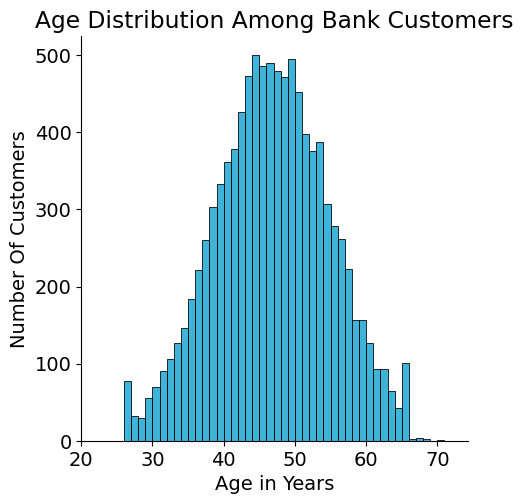

In [ ]:
#Now let's look at the demographics of our dataset
#Age Distribution
plt.rcParams['font.size']=14
plt.figure(figsize=[50,6])
max_age, min_age = df_clean.Customer_Age.max(),  df_clean.Customer_Age.min()
sns.displot(df_clean['Customer_Age'], bins= np.arange(min_age,max_age), color='#009ACD', kde=False )
plt.xticks(ticks=np.arange(20,80,10))
plt.title('Age Distribution Among Bank Customers')
plt.ylabel('Number Of Customers')
plt.xlabel('Age in Years');

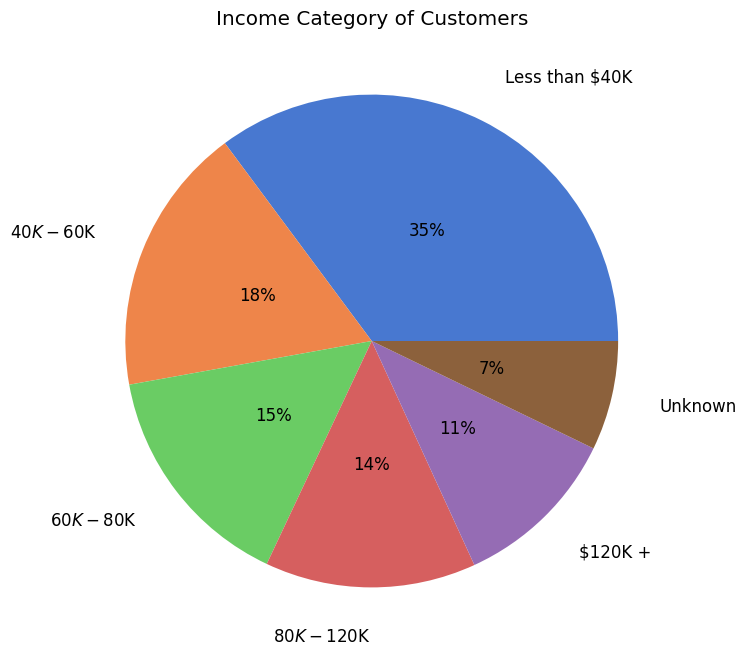

In [ ]:
#now for the final demographic we look at the income level
plt.rcParams['font.size'] = 12
plt.figure(figsize=[8,8])
sorted_counts = df_clean['Income_Category'].value_counts(sort=True)
plt.pie(sorted_counts, colors= sns.color_palette('muted'), labels=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       '$120K +', 'Unknown'],autopct='%1.0f%%' , shadow=False, startangle=0,
       pctdistance=0.5,labeldistance=1.2);
sns.despine()
plt.title('Income Category of Customers');

In [ ]:
df_clean = df_clean.drop(['CLIENTNUM'], axis=1) # no use


In [ ]:
df_clean.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Credit_Limit',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

In [ ]:
df_clean.describe()

,Customer_Age,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,0.759941,4404.086304,64.858695,0.712222
std,8.016814,9088.776650,0.219207,3397.129254,23.472570,0.238086
min,26.000000,1438.300000,0.000000,510.000000,10.000000,0.000000
25%,41.000000,2555.000000,0.631000,2155.500000,45.000000,0.582000
50%,46.000000,4549.000000,0.736000,3899.000000,67.000000,0.702000
75%,52.000000,11067.500000,0.859000,4741.000000,81.000000,0.818000
max,73.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000


In [ ]:
data_f = df_clean.copy()


In [ ]:
data_f.loc[(data_f.Attrition_Flag == 'Existing Customer'),'Attrition_Flag'] = 1
data_f.loc[(data_f.Attrition_Flag == 'Attrited Customer'),'Attrition_Flag'] = 0
data_f = data_f.astype({"Attrition_Flag": int})

In [ ]:
data_dummies = pd.get_dummies(data_f, drop_first=True)

In [ ]:
data_shuffled = data_dummies.sample(frac = 1)


In [ ]:
data_shuffled

,Attrition_Flag,Customer_Age,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
4065,1,52,10817.0,0.722,3889,60,0.818,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3787,1,37,3216.0,0.683,4039,81,1.077,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
8021,1,49,2960.0,0.962,4918,63,0.750,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8869,1,50,34516.0,0.778,8087,86,0.509,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4823,1,38,3317.0,0.862,3772,74,1.000,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,1,62,34516.0,0.564,3820,76,0.767,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9552,0,39,34516.0,1.052,7866,63,0.750,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4040,1,41,3460.0,0.644,3642,69,0.769,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
9848,0,30,4063.0,0.776,7463,70,0.707,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
X = data_shuffled.loc[:, data_shuffled.columns != 'Attrition_Flag']
y = data_shuffled.loc[:, data_shuffled.columns == 'Attrition_Flag']

In [ ]:
 # standardize the inputs

# standardization is one of the most common preprocessing tools
# since data of different magnitude (scale) can be biased towards high values,
# we want all inputs to be of similar magnitude
# this is a peculiarity of machine learning in general - most (but not all) algorithms do badly with unscaled data

# a very useful module we can use is StandardScaler
# it has much more capabilities than the straightforward 'preprocessing' method
from sklearn.preprocessing import StandardScaler


# we will create a variable that will contain the scaling information for this particular dataset
# here's the full documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# define scaler as an object
project_name_scaler = StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# import the libraries needed to create the Custom Scaler
# note that all of them are a part of the sklearn package
# moreover, one of them is actually the StandardScaler module,
# so you can imagine that the Custom Scaler is build on it

from sklearn.base import BaseEstimator, TransformerMixin

# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin):

    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do

    def __init__(self,columns,copy=True,with_mean=True,with_std=True):

        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None


    # the fit method, which, again based on StandardScale

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):

        # record the initial order of the columns
        init_col_order = X.columns

        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)

        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]

        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [ ]:
cols=X.columns.values

df_numeric_cols=data_shuffled.select_dtypes(include='number')
col_num=len(df_numeric_cols.columns)-1

# select the columns to omit
columns_to_omit = cols[col_num:]
# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in X.columns.values if x not in columns_to_omit]

# fit the data (calculate mean and standard deviation); they are automatically stored inside the object
scaler.fit(X)

# standardizes the data, using the transform method
# in the last line, we fitted the data - in other words
# we found the internal parameters of a model that will be used to transform data.
# transforming applies these parameters to our data
# note that when you get new data, you can just call 'scaler' again and transform it in the same way as now
scaled_inputs = scaler.transform(X)

# check the shape of the inputs
scaled_inputs.shape

(10127, 24)

In [ ]:
df.loc[(df.Attrition_Flag == 'Existing Customer'),'Attrition_Flag'] = 1
df.loc[(df.Attrition_Flag == 'Attrited Customer'),'Attrition_Flag'] = 0
df = df.astype({"Attrition_Flag": int})

In [ ]:
X1 = data_shuffled.loc[:, data_shuffled.columns != 'Attrition_Flag']
y1 = data_shuffled.loc[:, data_shuffled.columns == 'Attrition_Flag']


In [ ]:
y1

,Attrition_Flag
4065,1
3787,1
8021,1
8869,1
4823,1
...,...
4745,1
9552,0
4040,1
9848,0


In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
columns = X_train.columns


In [ ]:
print("Before undersampling - 0s: ", y_train[y_train['Attrition_Flag']==0].count())
print("Before undersampling - 1s: ", y_train[y_train['Attrition_Flag']==1].count())

Before undersampling - 0s:  Attrition_Flag    1150
dtype: int64
Before undersampling - 1s:  Attrition_Flag    5938
dtype: int64


In [ ]:
os_data_X, os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame (data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Attrition_Flag'])

In [ ]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of 0s in oversampled data",len(os_data_y[os_data_y['Attrition_Flag']==0]))
print("Number of 1s",len(os_data_y[os_data_y['Attrition_Flag']==1]))
print("Proportion of 0s data in oversampled data is ",len(os_data_y[os_data_y['Attrition_Flag']==0])/len(os_data_X))
print("Proportion of 1s data in oversampled data is ",len(os_data_y[os_data_y['Attrition_Flag']==1])/len(os_data_X))

length of oversampled data is  11876
Number of 0s in oversampled data 5938
Number of 1s 5938
Proportion of 0s data in oversampled data is  0.5
Proportion of 1s data in oversampled data is  0.5


In [ ]:
# import the LogReg model from sklearn
from sklearn.linear_model import LogisticRegression

# import the 'metrics' module, which includes important metrics we may want to use
from sklearn import metrics

In [ ]:
# create a logistic regression object
reg = LogisticRegression(solver='liblinear', max_iter=100)

In [ ]:
scaled_inputs = os_data_X
targets = os_data_y

In [ ]:
# fit our train inputs
# that is basically the whole training part of the machine learning
t= targets.values.ravel()
reg.fit(scaled_inputs,t)

LogisticRegression(solver='liblinear')

In [ ]:
# assess the train accuracy of the model
Logistic_Model_Score=reg.score(scaled_inputs,t)*100
Logistic_Model_Score

89.4493095318289

In [ ]:
feature_name = scaled_inputs.columns.values
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [ ]:
from sklearn.linear_model import Ridge


In [ ]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
6,Total_Ct_Chng_Q4_Q1,2.811832,16.640378
21,Income_Category_Unknown,2.202232,9.045183
17,Income_Category_$40K - $60K,2.094155,8.118579
20,Income_Category_Less than $40K,2.042085,7.706658
10,Education_Level_High School,1.983398,7.267396
13,Education_Level_Unknown,1.918350,6.809716
11,Education_Level_Post-Graduate,1.887383,6.602070
9,Education_Level_Graduate,1.866683,6.466810
12,Education_Level_Uneducated,1.855280,6.393490
8,Education_Level_Doctorate,1.815328,6.143088


In [ ]:
#Testing model
accuracy_list = []

from sklearn.metrics import accuracy_score
log_reg_pred = reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [ ]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from colorama import Fore
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  84.63%


In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, log_reg_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50       477
           1       0.91      0.91      0.91      2562

    accuracy                           0.85      3039
   macro avg       0.71      0.70      0.71      3039
weighted avg       0.84      0.85      0.85      3039



In [ ]:

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, log_reg_pred)

<Figure size 640x480 with 0 Axes>

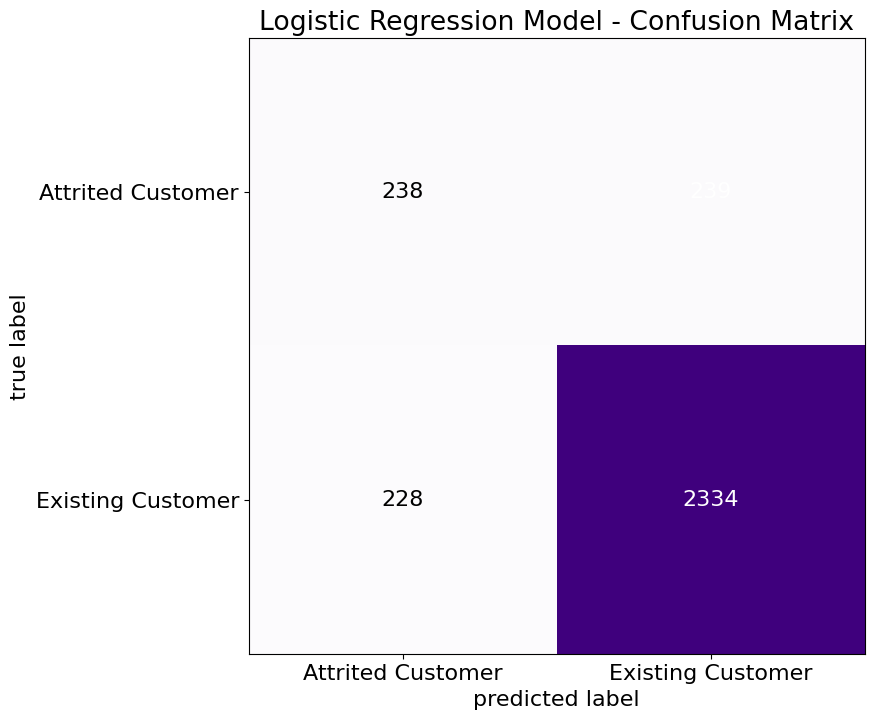

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Purples)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Attrited Customer","Existing Customer"], fontsize=16)
plt.yticks(range(2), ["Attrited Customer","Existing Customer"], fontsize=16)
plt.show()

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test, reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50       477
           1       0.91      0.91      0.91      2562

    accuracy                           0.85      3039
   macro avg       0.71      0.70      0.71      3039
weighted avg       0.84      0.85      0.85      3039



In [ ]:
pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


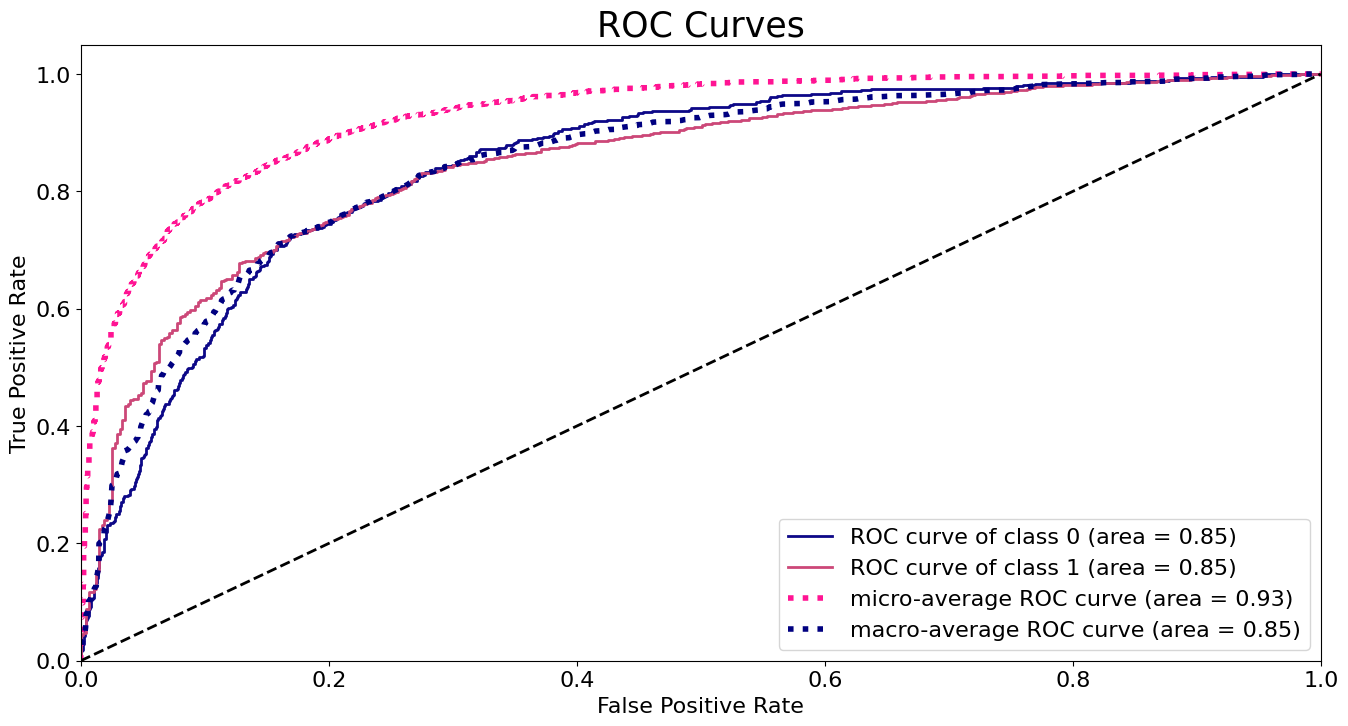

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import scikitplot as skplt
y_true = y_test # ground truth labels
y_probas = reg.predict_proba(X_test) # predicted probabilities generated by sklearn classifier

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_true = y_test # ground truth labels
y_probas = reg.predict_proba(X_test)[:, 1] # predicted probabilities for the positive class

# calculate AUC
auc = roc_auc_score(y_true, y_probas)
print('AUC:', auc)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_probas)



AUC: 0.8497365953289244


In [ ]:

# print FPR, TPR and thresholds
for i in range(len(thresholds)):
    print('Threshold:', thresholds[i], 'FPR:', fpr[i], 'TPR:', tpr[i])

In [ ]:
roc_df

NameError: ignored

In [ ]:
import statsmodels.api as sm

logit_model = sm.Logit(os_data_y, os_data_X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.340214
         Iterations 7
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.509    
Dependent Variable:      Attrition_Flag        AIC:                   8128.7714
Date:                    2023-05-04 15:36      BIC:                   8305.9460
No. Observations:        11876                 Log-Likelihood:        -4040.4  
Df Model:                23                    LL-Null:               -8231.8  
Df Residuals:            11852                 LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------